# CIFAR-10 Training Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

In [2]:
def smooth(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [3]:
# training accuracies

baseline = pd.read_csv('cifar-10/training-data/baseline/baseline-net-simple.csv')
branch = pd.read_csv('cifar-10/training-data/branch-net/branch-net.csv')
split = pd.read_csv('cifar-10/training-data/split-baseline-net/split-baseline-net-simple.csv')
concat = pd.read_csv('cifar-10/training-data/concat-net/concat-net.csv')
guide = pd.read_csv('cifar-10/training-data/guide-net/guide-net.csv')

adap_branch = pd.read_csv('cifar-10/training-data/branch-net/adaptative-branch-net.csv')
adap_split = pd.read_csv('cifar-10/training-data/split-baseline-net/adaptative-split-baseline-net-simple.csv')
adap_concat = pd.read_csv('cifar-10/training-data/concat-net/adaptative-concat-net.csv')
adap_guide = pd.read_csv('cifar-10/training-data/guide-net/adaptative-guide-net.csv')

In [4]:
df_loss = pd.DataFrame(data = {'baseline': baseline['loss'],
                              'branch-net': branch['loss'],
                              'split-net': split['loss'],
                              'concat-net': concat['loss'],
                              'guide-net': guide['loss']})

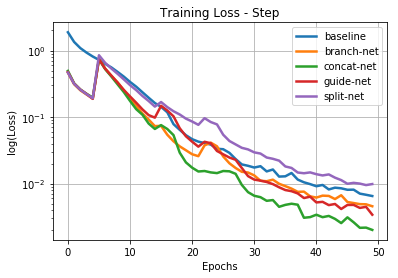

In [9]:
plt.semilogy(df_loss, linewidth=2.5)
plt.grid()
plt.legend(df_loss.columns)
plt.xlabel('Epochs')
plt.ylabel('log(Loss)')
plt.title('Training Loss - Step')
plt.savefig('_analysis-files/cifar-10/training-loss-step.pdf')
plt.show()

In [8]:
df_adap_loss = pd.DataFrame(data = {'baseline': baseline['loss'],
                              'branch-net': adap_branch['loss'],
                              'split-net': adap_split['loss'],
                              'concat-net': adap_concat['loss'],
                              'guide-net': adap_guide['loss']})

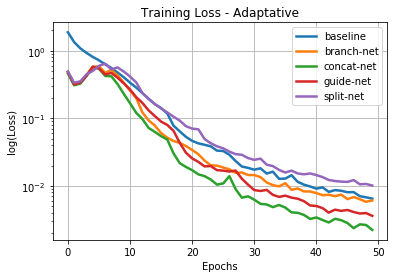

In [10]:
plt.semilogy(df_adap_loss, linewidth=2.5)
plt.grid()
plt.legend(df_adap_loss.columns)
plt.xlabel('Epochs')
plt.ylabel('log(Loss)')
plt.title('Training Loss - Adaptative')
plt.savefig('_analysis-files/cifar-10/training-loss-adaptative.pdf')
plt.show()

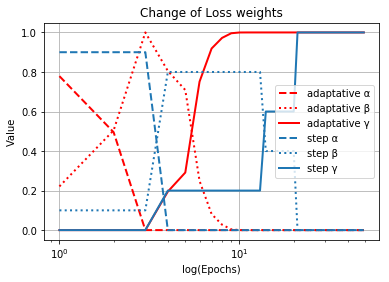

In [24]:
plt.semilogx(adap_concat['alpha'], 'r--', adap_concat['beta'], 'r:', adap_concat['gamma'], 'r', linewidth=2)
plt.plot(concat['alpha'], 'C0--', concat['beta'], 'C0:', concat['gamma'], 'C0', linewidth=2)
plt.legend(['adaptative α', 'adaptative β', 'adaptative γ', 'step α', 'step β', 'step γ'], loc='right')
plt.grid()
plt.xlabel('log(Epochs)')
plt.ylabel('Value')
plt.title('Change of Loss weights')
plt.savefig('_analysis-files/cifar-10/loss-weights-change.pdf')
plt.show()

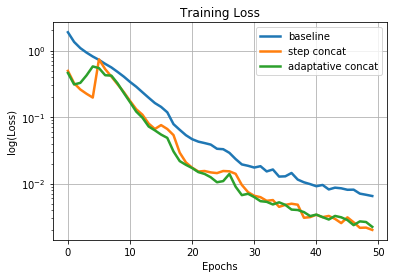

In [26]:
plt.semilogy(baseline['loss'], 'C0',
         concat['loss'], 'C1',
         adap_concat['loss'], 'C2', 
         linewidth=2.5)

plt.legend(['baseline', 'step concat', 'adaptative concat'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('log(Loss)')
plt.title('Training Loss')
plt.savefig('_analysis-files/cifar-10/comparison-loss-models-concat.pdf')
plt.show()

In [17]:
adap_concat.head()

,epoch,alpha,beta,gamma,loss,lr,predictions_coarse1_acc,predictions_coarse1_loss,predictions_coarse2_acc,predictions_coarse2_loss,predictions_fine_acc,predictions_fine_loss,time_elapsed,val_loss,val_predictions_coarse1_acc,val_predictions_coarse1_loss,val_predictions_coarse2_acc,val_predictions_coarse2_loss,val_predictions_fine_acc,val_predictions_fine_loss
0,0,0.900000,0.100000,0.000000,0.459942,0.00025,0.852475,0.353746,0.495325,1.415706,0.097125,3.121870,30.914555,0.450003,0.8435,0.374541,0.5902,1.129160,0.1149,2.646995
1,1,0.778900,0.221100,0.000000,0.308876,0.00025,0.911625,0.232756,0.642375,0.993955,0.095925,3.141229,27.297930,0.263275,0.9216,0.199525,0.6853,0.837026,0.0923,2.595398
2,2,0.495338,0.504662,0.000000,0.326509,0.00025,0.928025,0.190802,0.712150,0.804583,0.094025,3.170703,27.346913,0.335159,0.9328,0.172633,0.6627,0.907714,0.1059,2.730283
3,3,0.000000,1.000000,0.000000,0.422928,0.00025,0.940125,0.159229,0.755025,0.681754,0.091450,3.146784,27.313030,0.694425,0.8693,0.381217,0.6537,1.001846,0.0876,2.776828
4,4,0.000000,0.805211,0.194789,0.576391,0.00025,0.942250,0.153766,0.794800,0.576391,0.090100,3.139012,27.339498,0.665772,0.9385,0.157875,0.7639,0.665772,0.0734,2.726189


In [28]:
df_val_loss = pd.DataFrame(data = {'baseline': baseline['val_loss'],
                              'branch-net': branch['val_predictions_fine_loss'],
                              'split-net': split['val_predictions_fine_loss'],
                              'concat-net': concat['val_predictions_fine_loss'],
                              'guide-net': guide['val_predictions_fine_loss']})

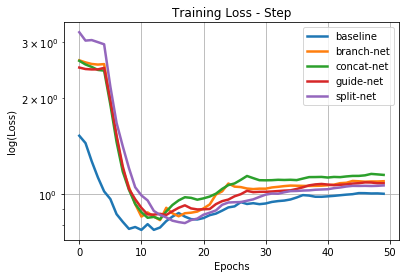

In [29]:
df_val_loss = df_val_loss.apply(lambda x: smooth(x, 0.6), axis=0)

plt.semilogy(df_val_loss, linewidth=2.5)
plt.grid()
plt.legend(df_val_loss.columns)
plt.xlabel('Epochs')
plt.ylabel('log(Loss)')
plt.title('Training Loss - Step')
plt.savefig('_analysis-files/cifar-10/validation-loss-step.pdf')
plt.show()

In [30]:
df_val_acc = pd.DataFrame(data = {'baseline': baseline['val_acc'],
                              'branch-net': branch['val_predictions_fine_acc'],
                              'split-net': split['val_predictions_fine_acc'],
                              'concat-net': concat['val_predictions_fine_acc'],
                              'guide-net': guide['val_predictions_fine_acc']})

In [31]:
# df_val_acc.max()

In [32]:
df_val_acc = df_val_acc.apply(lambda x: smooth(x, 0.6), axis=0)

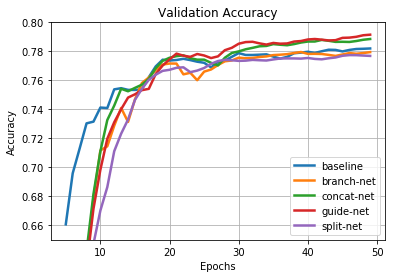

In [49]:
plt.plot(df_val_acc[5:], linewidth=2.5)
plt.grid()
axes = plt.gca()
axes.set_ylim([0.65,0.8])
plt.legend(df_val_acc.columns)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.savefig('_analysis-files/cifar-10/validation-accuracy-step.pdf')
plt.show()